In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [4]:
# Load the data
data = pd.read_csv('data/train_normalized.csv').drop(columns=['id'])
print(data.head())

        amt  city_pop  trans_hour  day_of_week  trans_month  location_diff  \
0  0.265021 -0.360419    0.260870     0.285714     0.083333       1.151013   
1 -0.085246 -0.462684    0.086957     0.714286     0.083333      -0.568319   
2 -0.497846 -0.495328    0.913043     0.428571     0.083333       0.713090   
3 -0.481426 -0.419992    0.695652     0.857143     0.083333       0.189719   
4 -0.107876 -0.340621    0.826087     0.857143     0.083333       0.438265   

        age  is_fraud  full_name_fraud_rate  cc_num_fraud_rate  ...  \
0 -0.306232         0              0.057692           0.000000  ...   
1  0.139646         0              0.163934           0.163934  ...   
2 -1.325384         0              0.222222           0.125000  ...   
3  3.069707         0              0.027778           0.027778  ...   
4  1.732070         0              0.310345           0.310345  ...   

   job_Warden/ranger  job_Warehouse manager  job_Waste management officer  \
0              False       

In [5]:
# Get the first 5k for training
data = data[:10000]
# Split the data into features and target
X = data.drop(columns=['is_fraud'])
y = data['is_fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy: 0.911


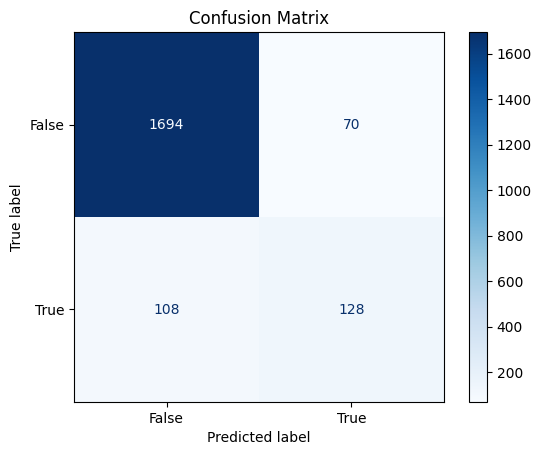

In [6]:
# Linear SVM model
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearSVC(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.9085


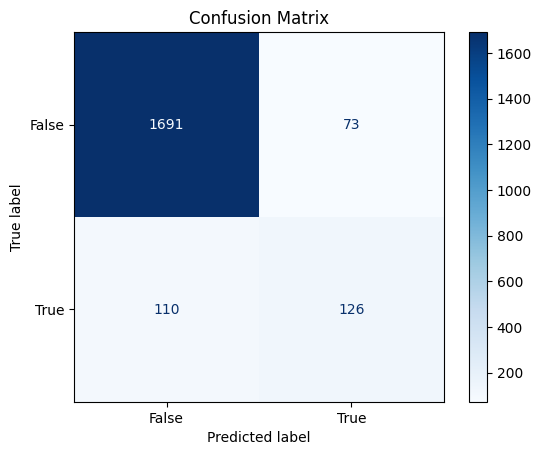

In [7]:
# Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.964


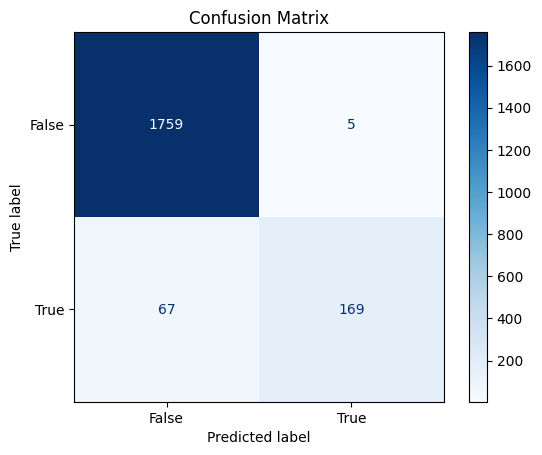

In [8]:
# Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.971


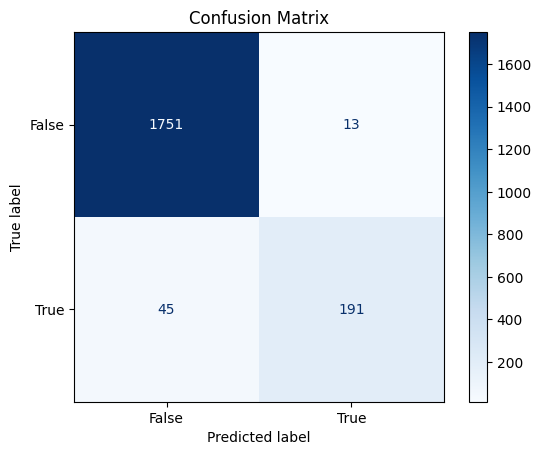

In [9]:
# Gradient Boosting model
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.9675


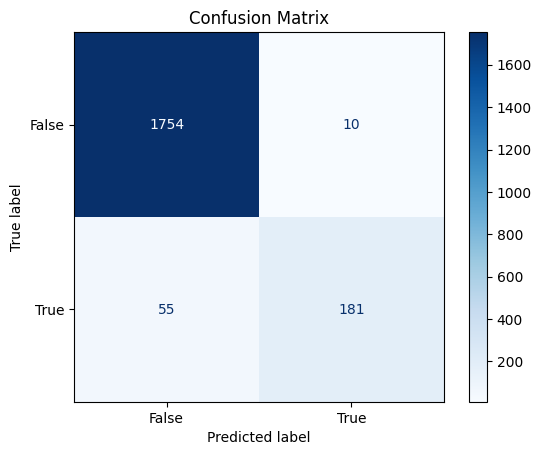

In [10]:
# Combine the result of the models, and use a voting classifier
from sklearn.ensemble import VotingClassifier
model = VotingClassifier(estimators=[
    ('random_forest', RandomForestClassifier(random_state=42)),
    ('gradient_boosting', GradientBoostingClassifier(random_state=42))
], voting='soft')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [25]:
# Tune the hyperparameters of the models on a smaller dataset
data = data[:5000]
X = data.drop(columns=['is_fraud'])
y = data['is_fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Best Parameters: {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': None}
Best Score: 0.9728113964256856
Accuracy: 0.962


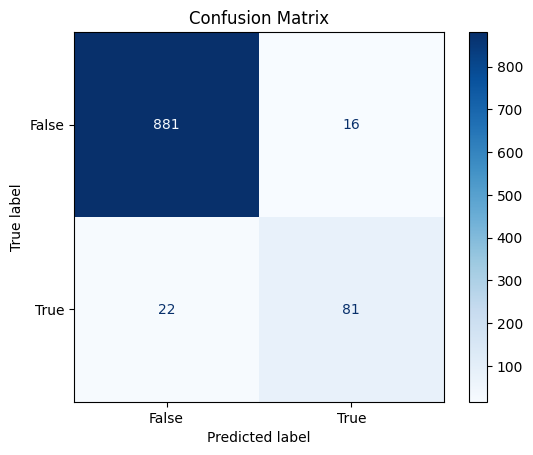

In [27]:
# Random Forest model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define parameter distribution
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter combinations to try
    scoring='roc_auc',  # Use 'roc_auc' for fraud detection (imbalanced classes)
    cv=3,  # 3-fold cross-validation
    n_jobs=-1,  # Use all available cores
    random_state=42
)

# Fit the RandomizedSearchCV
random_search_rf.fit(X_train, y_train)

# Get the best parameters and score
print("Best Parameters:", random_search_rf.best_params_)
print("Best Score:", random_search_rf.best_score_)

# Get the best estimator
model = random_search_rf.best_estimator_

# Predict
y_pred = model.predict(X_test)

# Print accuracy
print('Accuracy:', accuracy_score(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

Best parameters: {'subsample': 0.8, 'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 7, 'learning_rate': 0.01}
Best score: 0.9748961252803149
Accuracy: 0.966


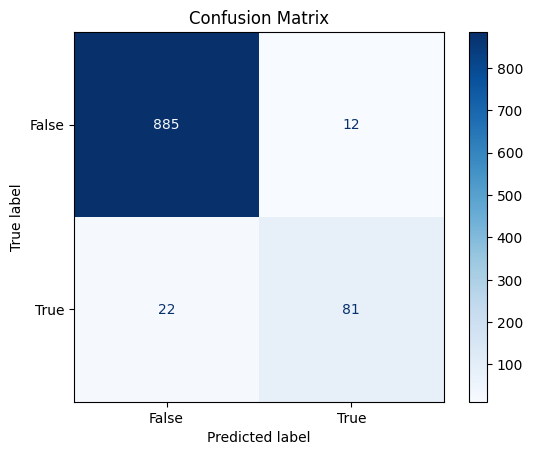

In [28]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define parameter distribution
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GradientBoostingClassifier
xgb = GradientBoostingClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter combinations to try
    scoring='roc_auc',  # Use 'roc_auc' for imbalanced classes
    cv=3,  # 3-fold cross-validation
    n_jobs=-1,  # Use all available cores
    random_state=42
)

# Fit the RandomizedSearchCV
random_search_xgb.fit(X_train, y_train)

# Get the best parameters and score
print('Best parameters:', random_search_xgb.best_params_)
print('Best score:', random_search_xgb.best_score_)

# Get the best estimator
model = random_search_xgb.best_estimator_

# Predict
y_pred = model.predict(X_test)

# Print accuracy
print('Accuracy:', accuracy_score(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.9816700610997964


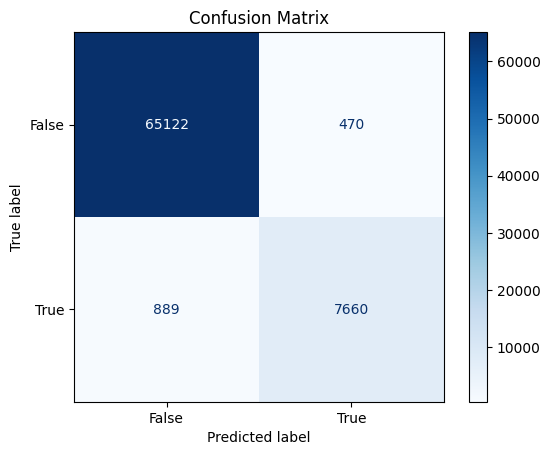

In [29]:
data = pd.read_csv('data/train_normalized.csv').drop(columns=['id'])
X = data.drop(columns=['is_fraud'])
y = data['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine the result of the models, and use a voting classifier
from sklearn.ensemble import VotingClassifier
model = VotingClassifier(estimators=[
    ('random_forest', RandomForestClassifier(n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=None, max_depth=None)),
    ('gradient_boosting', GradientBoostingClassifier(subsample=0.8, n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_depth=7, learning_rate=0.01))
], voting='soft')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [12]:
# Train combined model on the full data
model = VotingClassifier(estimators=[
    ('random_forest', RandomForestClassifier(n_estimators=400, min_samples_split=5, min_samples_leaf=4, max_features=None, max_depth=None)),
    ('gradient_boosting', GradientBoostingClassifier(subsample=0.8, n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_depth=7, learning_rate=0.01))
], voting='soft', n_jobs=-1)
model.fit(X, y)

# Load the test data
test_data = pd.read_csv('data/test_normalized.csv')
print(test_data.head())

# Predict the test data
X_test = test_data.drop(columns=['id', 'is_fraud'])
y_pred = model.predict(X_test)

# Save the result
test_data['is_fraud'] = y_pred
result = test_data[['id', 'is_fraud']]
result.to_csv('data/submission.csv', index=False)


       id       amt  city_pop  trans_hour  day_of_week  trans_month  \
0   52329 -0.448747  3.894071    0.565217     0.714286     0.083333   
1   92215 -0.397471  0.209472    0.913043     0.285714     0.083333   
2  107070 -0.097929 -0.522276    1.000000     0.285714     0.083333   
3  117508  3.442625 -0.525998    0.608696     0.000000     0.083333   
4  525132  0.168025 -0.506584    0.956522     0.142857     0.083333   

   location_diff       age  is_fraud  full_name_fraud_rate  ...  \
0      -2.080644  1.483623         0              0.062500  ...   
1      -1.272799  2.440915         0              0.166667  ...   
2      -0.840216 -0.941515         0              0.000000  ...   
3       1.530609  1.292165         0              1.000000  ...   
4      -0.451520  0.398693         0              0.142857  ...   

   job_Warden/ranger  job_Warehouse manager  job_Waste management officer  \
0              False                  False                         False   
1              F